In [1]:
import numpy
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import datetime

In [2]:
data = pd.read_csv('./data/omni_full_1964-2022.csv')
data

,Unnamed: 0,time1,Rot$,IMF,PLS,IMF_PTS,PLS_PTS,ABS_B,F,THETA_AV,...,F10_INDEX+48,BZ_GSE+1,BZ_GSE+2,BZ_GSE+3,BZ_GSE+4,BZ_GSE+6,BZ_GSE+8,BZ_GSE+12,BZ_GSE+24,BZ_GSE+48
0,0,1963-01-01 01:00:00,1771.0,99.0,99.0,999.0,999.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1963-01-01 02:00:00,1771.0,99.0,99.0,999.0,999.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1963-01-01 03:00:00,1771.0,99.0,99.0,999.0,999.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1963-01-01 04:00:00,1771.0,99.0,99.0,999.0,999.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1963-01-01 05:00:00,1771.0,99.0,99.0,999.0,999.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520438,520438,2022-05-13 12:00:00,9999.0,99.0,99.0,999.0,999.0,NaN,NaN,NaN,...,135.600006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
520439,520439,2022-05-13 13:00:00,9999.0,99.0,99.0,999.0,999.0,NaN,NaN,NaN,...,135.600006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
520440,520440,2022-05-13 14:00:00,9999.0,99.0,99.0,999.0,999.0,NaN,NaN,NaN,...,135.600006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
520441,520441,2022-05-13 15:00:00,9999.0,99.0,99.0,999.0,999.0,NaN,NaN,NaN,...,135.600006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data.index = data['time1']
data.drop('time1', axis=1, inplace=True)
data.columns

Index(['Rot$', 'IMF', 'PLS', 'IMF_PTS', 'PLS_PTS', 'ABS_B', 'F', 'THETA_AV',
       'PHI_AV', 'BX_GSE', 'BY_GSE', 'BZ_GSE', 'BY_GSM', 'BZ_GSM',
       'SIGMA$ABS_B', 'SIGMA$B', 'SIGMA$Bx', 'SIGMA$By', 'SIGMA$Bz', 'T', 'N',
       'V', 'PHI$V', 'THETA$V', 'Ratio', 'Pressure', 'SIGMA$T', 'SIGMA$N',
       'SIGMA$V', 'SIGMA$PHI$V', 'SIGMA$THETA$V', 'SIGMA$ratio', 'E', 'Beta',
       'Mach_num', 'Mgs_mach_num', 'PR$FLX_1', 'PR$FLX_2', 'PR$FLX_4',
       'PR$FLX_10', 'PR$FLX_30', 'PR$FLX_60', 'MFLX', 'R', 'F10_INDEX', 'KP',
       'DST', 'AE', 'AP_INDEX', 'AL_INDEX', 'AU_INDEX', 'PC_N_INDEX',
       'Solar_Lyman_alpha', 'Proton_QI', 'DST+1', 'DST+2', 'DST+3', 'DST+4',
       'DST+6', 'DST+8', 'DST+12', 'DST+24', 'DST+48', 'F10_INDEX+1',
       'F10_INDEX+2', 'F10_INDEX+3', 'F10_INDEX+4', 'F10_INDEX+6',
       'F10_INDEX+8', 'F10_INDEX+12', 'F10_INDEX+24', 'F10_INDEX+48',
       'BZ_GSE+1', 'BZ_GSE+2', 'BZ_GSE+3', 'BZ_GSE+4', 'BZ_GSE+6', 'BZ_GSE+8',
       'BZ_GSE+12', 'BZ_GSE+24', 'BZ_GSE+4

In [10]:
data_relevant = data[['BZ_GSE', 'DST', 'SIGMA$Bz']]
data_relevant.isna().sum(), len(data_relevant)

(BZ_GSE      124067
 DST              0
 SIGMA$Bz    124606
 dtype: int64,
 520443)

In [13]:
data_relevant.index = pd.to_datetime(data_relevant.index)
data_relevant_interpolated = data_relevant.interpolate()
data_relevant_interpolated.isna().sum()

BZ_GSE      7933
DST            0
SIGMA$Bz    7933
dtype: int64

In [15]:
def calculate_cross_correlation(series1, series2, max_lag=48):
    lags = range(-max_lag, max_lag + 1)
    cross_corr_values = [series1.corr(series2.shift(lag)) for lag in lags]
    return lags, cross_corr_values

In [58]:
lags, cross_corr_bz_dst = calculate_cross_correlation(data_relevant_interpolated['BZ_GSE'], data_relevant_interpolated['DST'])
lags, cross_corr_sigma_bz_dst = calculate_cross_correlation(data_relevant_interpolated['SIGMA$Bz'], data_relevant_interpolated['DST'])
lags, cross_corr_dst_sigma_bz = calculate_cross_correlation(data_relevant_interpolated['DST'], data_relevant_interpolated['SIGMA$Bz'])
lags, cross_corr_dst_bz = calculate_cross_correlation(data_relevant_interpolated['DST'], data_relevant_interpolated['BZ_GSE'])

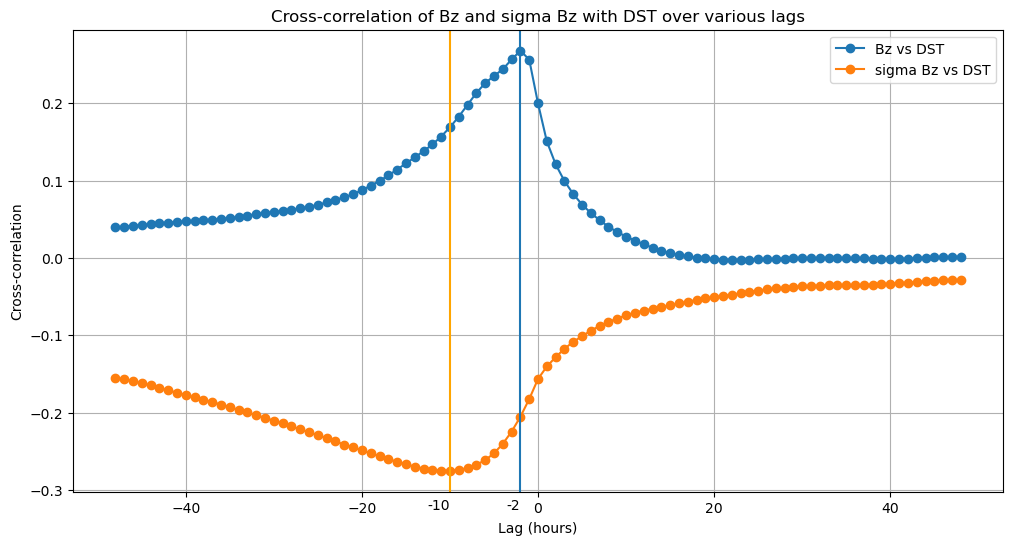

In [61]:
plt.figure(figsize=(12, 6))
plt.plot(lags, cross_corr_bz_dst, label="Bz vs DST", marker='o')
plt.plot(lags, cross_corr_sigma_bz_dst, label="sigma Bz vs DST", marker='o')
plt.xlabel("Lag (hours)")
plt.ylabel("Cross-correlation")
plt.legend()
plt.title("Cross-correlation of Bz and sigma Bz with DST over various lags")
plt.grid()

plt.axvline(x=lags[cross_corr_bz_dst.index(max(cross_corr_bz_dst))], label="d")
plt.text(lags[cross_corr_bz_dst.index(max(cross_corr_bz_dst))], -0.32, f"{lags[cross_corr_bz_dst.index(max(cross_corr_bz_dst))]}", rotation=0, color='black',
         verticalalignment='center', horizontalalignment='right')

plt.axvline(x=lags[cross_corr_sigma_bz_dst.index(min(cross_corr_sigma_bz_dst))], color="orange")
plt.text(lags[cross_corr_sigma_bz_dst.index(min(cross_corr_sigma_bz_dst))], -0.32, f"{lags[cross_corr_sigma_bz_dst.index(min(cross_corr_sigma_bz_dst))]}", rotation=0, color='black',
         verticalalignment='center', horizontalalignment='right')

plt.savefig("./data/cross_correlation_sigma_bz_bz_dst.png")
plt.show()

In [37]:
lags[cross_corr_sigma_bz_dst.index(min(cross_corr_sigma_bz_dst))]

-10

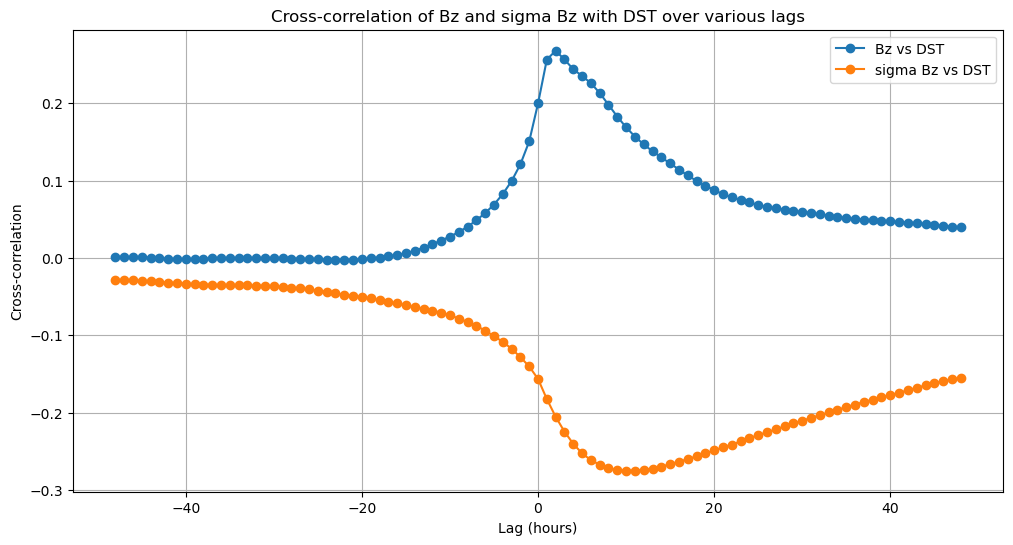

In [59]:
plt.figure(figsize=(12, 6))
plt.plot(lags, cross_corr_dst_bz, label="Bz vs DST", marker='o')
plt.plot(lags, cross_corr_dst_sigma_bz, label="sigma Bz vs DST", marker='o')
plt.xlabel("Lag (hours)")
plt.ylabel("Cross-correlation")
plt.legend()
plt.title("Cross-correlation of Bz and sigma Bz with DST over various lags")
plt.grid()

plt.show()